In [1]:
from rbibm.utils.utils_data import query, query_main, remove_entry_by_id
from rbibm.plots.main_plots import plot_adversarial_posterior, plot_adversarial_posterior_predictive
from rbibm.plots.metric_plots import plot_expected_coverage
from rbibm.plots.multi_plots import multi_plot, plot_rob_tolerance_plot
from rbibm.plots.styles import use_style

In [2]:
import torch

In [3]:
name = "pyloric" 

In [4]:
ids = [query_main(name, task="pyloric", defense="None").iloc[0].id, query_main(name, task="pyloric", params_defense_beta=100.).iloc[0].id]

In [5]:
import matplotlib.pyplot as plt

In [6]:
from pyloric import create_prior

lower = create_prior().lower
upper = create_prior().upper

In [7]:
colors = ["#08519c", "#d94801"]

In [8]:
color_map_defenses = {"None": "#0868ac", "FIMTraceRegularizer": "#8856a7", "L2PGDTargetedAdversarialTraining": "#df65b0", "L2PGDrKLTrades": "#2ca25f"}

In [9]:
figsize_col=2.
figsize_row_expected_cov = 2.
figsize_row_rob = 1.

{'task': 'pyloric', 'attack': 'L2PGDAttack', 'model_name': 'maf', 'hue': 'defense', 'verbose': False, 'legend': False, 'metric_rob': 'ReverseKLRobMetric', 'id': ['9d5b5117-050e-46dd-b17a-90e29c1e22eb', 'af91564a-e748-41bd-8aa3-c60370fb8df9']}


/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


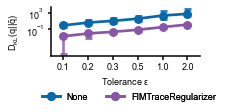

In [10]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "model_name", "attack", plot_rob_tolerance_plot, task="pyloric",
                            attack="L2PGDAttack", model_name="maf",  hue="defense", figsize_per_col=figsize_row_expected_cov*1.6,legend_kwargs={"labelspacing": 2.}, 
                            legend_bbox_to_anchor=[0.6,-0.1],figsize_per_row=figsize_row_expected_cov*0.75,  verbose=False, legend=False, metric_rob="ReverseKLRobMetric", id=ids[::-1], color_map = color_map_defenses)
    axes[0][0].set_ylabel("$D_{KL}(q||\\tilde{q})$")
    axes[0][0].yaxis.set_label_coords(-0.2, 0.5)
    axes[0][0].set_yticks([0.1,1000])
    axes[0][0].set_title("")
    handles, labels = plt.gca().get_legend_handles_labels()
    handles = [h[0] for h in handles]
    order = [1,0]
    fig.legends[0] = fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=[0.65,-0.15], labelspacing=2, ncol=2,loc="lower center")
    fig.savefig("robustness_metric.svg")
    plt.show()

In [11]:
import torch
torch.manual_seed(2)

Following data row is used:
Id: af91564a-e748-41bd-8aa3-c60370fb8df9, Task: pyloric, Model: maf, Defense: None, Loss: NLLLoss, N_train: 750000, Id adversarial =cdebe5c6-8b86-44e8-92c6-891284f3c6aa, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/tasks/pyloric_stg.py:250: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525551200/work/torch/csrc/utils/tensor_new.cpp:230.)
  xs = torch.as_tensor(xs, dtype=torch.float)


2
2


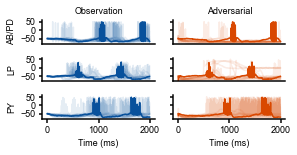

In [12]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="pyloric", id=ids[0],attack="L2PGDAttack",metric_rob="ReverseKLRobMetric", eps=2., idx_adv_example=10, plotting_kwargs={"colors":colors,"figsize":(figsize_row_expected_cov*2.1, figsize_row_expected_cov*1.1)})
    fig.savefig("pyloric_posterior_predictive.svg", transparent=True)
    plt.show()

Following data row is used:
Id: 9d5b5117-050e-46dd-b17a-90e29c1e22eb, Task: pyloric, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 750000, Id adversarial =396fb3b8-8dbd-4767-a61d-ec2ebd0fe756, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 
2
2


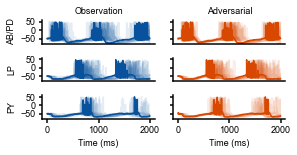

In [13]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="pyloric", id=ids[1],attack="L2PGDAttack",metric_rob="ReverseKLRobMetric", eps=2., idx_adv_example=44, plotting_kwargs={"colors":colors,"figsize":(figsize_row_expected_cov*2.1, figsize_row_expected_cov*1.1)})
    fig.savefig("pyloric_posterior_predictive_rob.svg", transparent=True)
    plt.show()

In [14]:
import numpy as np

Following data row is used:
Id: af91564a-e748-41bd-8aa3-c60370fb8df9, Task: pyloric, Model: maf, Defense: None, Loss: NLLLoss, N_train: 750000, Id adversarial =cdebe5c6-8b86-44e8-92c6-891284f3c6aa, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


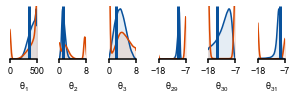

In [15]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="pyloric", attack="L2PGDAttack", idx_adv_example=10,  n_samples=100000, eps=2., metric_rob="ReverseKLRobMetric",type = "marginalplot", plotting_kwargs={"subset":[0,1,2,28,29,30], "colors":colors, "limits":
        [np.round(lower[[0,1,2,28,29,30]]),np.round(upper[[0,1,2,28,29,30]])], "bins":500,"figsize":(figsize_row_expected_cov*2.1, figsize_row_expected_cov*0.7), "labels": [r"$\theta_1$",r"$\theta_2$",r"$\theta_3$",r"$\theta_{29}$",r"$\theta_{30}$",r"$\theta_{31}$"]},id=ids[0])
    fig.savefig("pyloric_adv_post_marginals.svg", transparent=True)
    plt.show()

Following data row is used:
Id: 9d5b5117-050e-46dd-b17a-90e29c1e22eb, Task: pyloric, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 750000, Id adversarial =396fb3b8-8dbd-4767-a61d-ec2ebd0fe756, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


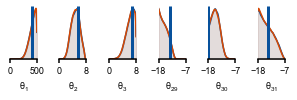

In [16]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="pyloric", attack="L2PGDAttack", idx_adv_example=44,  n_samples=100000, eps=2., metric_rob="ReverseKLRobMetric",type = "marginalplot", plotting_kwargs={"subset":[0,1,2,28,29,30], "colors":colors, "limits":
        [np.round(lower[[0,1,2,28,29,30]]),np.round(upper[[0,1,2,28,29,30]])], "bins":500,"figsize":(figsize_row_expected_cov*2.1,
         figsize_row_expected_cov*0.7), "labels": [r"$\theta_1$",r"$\theta_2$",r"$\theta_3$",r"$\theta_{29}$",r"$\theta_{30}$",r"$\theta_{31}$"]},id=ids[1])
    fig.savefig("pyloric_adv_post_marginals_rob.svg", transparent=True)
    plt.show()

In [18]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }

{'task': 'pyloric', 'attack': 'L2PGDAttack', 'with_eps': True, 'hue': 'eps', 'metric_rob': 'ReverseKLRobMetric', 'id': ['af91564a-e748-41bd-8aa3-c60370fb8df9', '9d5b5117-050e-46dd-b17a-90e29c1e22eb'], 'with_grid': False, 'defense': 'None'}
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['af91564a-e748-41bd-8aa3-c60370fb8df9']
{'task': 'pyloric', 'attack': 'L2PGDAttack', 'with_eps': True, 'hue': 'eps', 'metric_rob': 'ReverseKLRobMetric', 'id': ['af91564a-e748-41bd-8aa3-c60370fb8df9', '9d5b5117-050e-46dd-b17a-90e29c1e22eb'], 'with_grid': False, 'defense': 'FIMTraceRegularizer'}
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['9d5b5117-050e-46dd-b17a-90e29c1e22eb']


/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


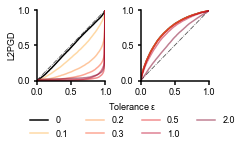

In [19]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "defense", "attack", plot_expected_coverage, task="pyloric", attack="L2PGDAttack", legend_bbox_to_anchor=[0.6,-0.22],
                            with_eps=True, hue="eps", metric_rob="ReverseKLRobMetric", id=ids, color_map=color_map_eps, legend_ncol=4, figsize_per_col=figsize_row_expected_cov*0.8, figsize_per_row=figsize_row_expected_cov*0.9, with_grid=False)
    legend = fig.legends[0].set_title("Tolerance $\\epsilon$")
    axes[0][0].set_title("")
    axes[0][1].set_title("")
    axes[0][1].set_xlabel("")
    axes[0][0].set_xlabel("")
    fig.savefig("coverages.svg", transparent=True)
    plt.show()